In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import pyplot as plt
import pandas as pd

# import des données
# dfx = pd.read_csv('data/x.csv')
# dfy = pd.read_csv('data/y.csv')
df = pd.read_csv('data/clean_aiplane.csv')
SEED = 1234

print(df.columns)

# création des jeux de train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop('satisfaction', axis=1), df['satisfaction'], test_size=0.2, random_state=SEED)

# normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

print(X_train.shape)

# convertir les données y aussi :
y_train = y_train.squeeze().ravel()
y_test = y_test.squeeze().ravel()

Index(['age', 'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'arrival delay in minutes', 'satisfaction', 'female',
       'male', 'loyal customer', 'disloyal customer', 'business', 'eco',
       'eco plus', 'business travel', 'personal travel'],
      dtype='object')
[[ 0.96420275 -0.007381    0.15160846 ... -0.27996088 -1.49459739
   1.49459739]
 [-0.16109611  0.3246088  -0.65541343 ... -0.27996088  0.6690765
  -0.6690765 ]
 [-0.16109611 -0.93815602  0.95863036 ...  3.57192756  0.6690765
  -0.6690765 ]
 ...
 [ 1.0303968  -0.06455145  1.76565225 ... -0.27996088  0.6690765
  -0.6690765 ]
 [ 0.30226225 -0.8679467  -0.65541343 ... -0.27996088 -1.49459739
   1.49459739]
 [ 0.7656206   0.309

In [39]:
# entrainement du modèle 
forest = RandomForestClassifier(n_jobs=-1, random_state=SEED)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.9622364661363811


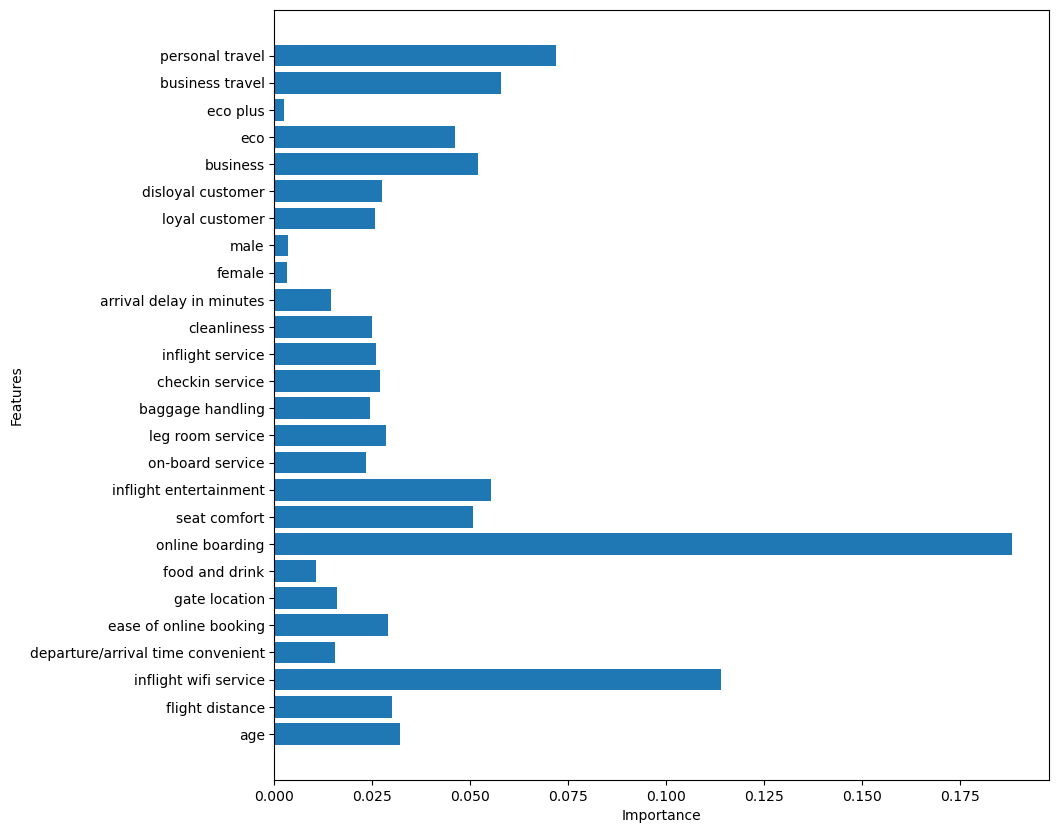

In [40]:
# pas mal. On va pouvoir chercher l’influence des facteurs.
influ = forest.feature_importances_
plt.figure(figsize=(10, 10))
plt.barh(df.drop('satisfaction', axis=1).columns, influ)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

0.8836975828249286


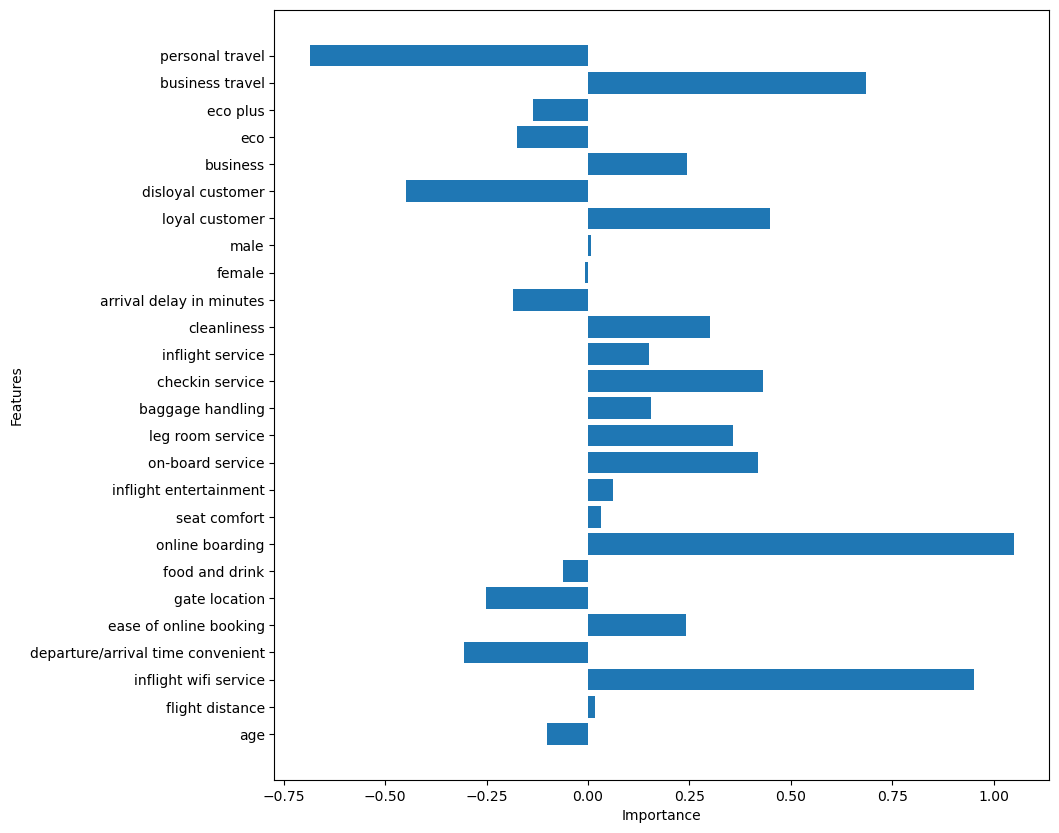

In [41]:
# nous n’avons pas le sens de l’influence avec ce graphique (en fait ce modèle ne permet pas de calculer cette valeur aussi simplement)
# visiblement on peut l’avoir avec SHAP (https://shap.readthedocs.io/en/latest/) mais il faut apprendre à s’en servir

# avec un autre modèle c’est possible d’avoir le sens, c’est interessant de comparer :

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=SEED)
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

influ2 = logreg.coef_.ravel()
plt.figure(figsize=(10, 10))
plt.barh(df.drop('satisfaction', axis=1).columns, influ2)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()